In [1]:
import os

import numpy as np
import pandas as pd

from natsort import natsorted

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator        

In [2]:
# I/O

main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))  

out = os.path.join(os.getcwd(), 'output/cells_per_patch')
if not os.path.exists(out):
    os.makedirs(out)

Window size = 14


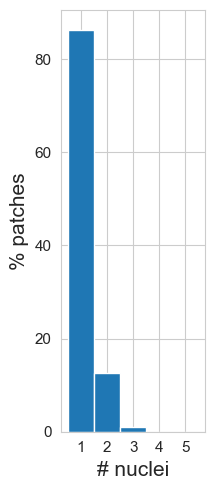


Window size = 46


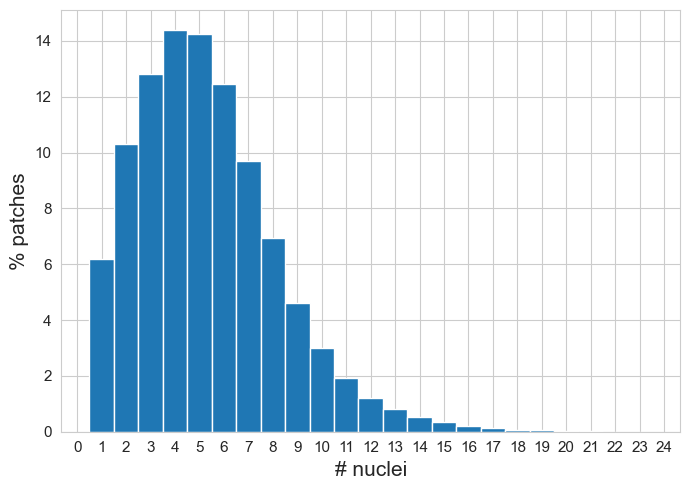

In [3]:
# generate histograms showing the distribution of nuclei among 14x14-pixel and 46x46-pixel image patches

for window_size in [14, 46]:
    
    print(f'Window size = {window_size}')
    
    if not os.path.exists(os.path.join(out, f'counts{window_size}.csv')):

        half_window_size = window_size / 2
        
        counts = []
        for i, j in main.iterrows():
            if i % 10000 == 0:
                print(i)
            
            # isolate cells in window_size x window_size area, append nuclei count to counts list
            x = j['X_centroid']
            y = j['Y_centroid']
            patch = (
                main[(main['Y_centroid'].between(y - half_window_size, y + half_window_size)) &
                        (main['X_centroid'].between(x - half_window_size, x + half_window_size))].copy()
            )
            counts.append(len(patch))

        plot = pd.DataFrame(
            data={f'Window Size: {window_size}x{window_size} pixels': 1, 'Cell Count': counts}
        )

        q1, q3 = np.percentile(plot['Cell Count'], [25, 75])
        iqr = q3 - q1
        plot['Q1'] = q1
        plot['Q3'] = q3
        plot['IQR'] = iqr

        plot.to_csv(os.path.join(out, f'counts{window_size}.csv'), index=False)
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set_style('whitegrid')

        if window_size == 14:
            fig, ax = plt.subplots(figsize=(2.25,5))
        elif window_size == 46:
            fig, ax = plt.subplots(figsize=(7,5))

        g = sns.histplot(data=plot, x='Cell Count', discrete=True, stat='percent', color='tab:blue', alpha=1)
        
        # Get the heights of the bars (counts)
        heights = [patch.get_height() for patch in g.patches]
        
        # increase x-tick frequency
        g.axes.xaxis.set_major_locator(MultipleLocator(1))
        
        g.set_xlabel('# nuclei', fontsize=15)
        g.set_ylabel('% patches', fontsize=15)

        plt.tight_layout()
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}.pdf'))
        plt.show()
        plt.close('all')
        print()
    
    else:  # if counts.csv has already been saved
        
        plot = pd.read_csv(os.path.join(out, f'counts{window_size}.csv'))

        plt.rcParams['font.family'] = 'Arial'
        sns.set_style('whitegrid')
        
        if window_size == 14:
            fig, ax = plt.subplots(figsize=(2.25,5))
        elif window_size == 46:
            fig, ax = plt.subplots(figsize=(7,5))

        g = sns.histplot(data=plot, x='Cell Count', discrete=True, stat='percent', color='tab:blue', alpha=1)
        
        # Get the heights of the bars (counts)
        heights = [patch.get_height() for patch in g.patches]
        
        # increase x-tick frequency
        g.axes.xaxis.set_major_locator(MultipleLocator(1))
        
        g.set_xlabel('# nuclei', fontsize=15)
        g.set_ylabel('% patches', fontsize=15)
        
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

        plt.tight_layout()
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}.pdf'))
        plt.show()
        plt.close('all')
        print()

In [4]:
# generate histograms showing the distribution of nuclei per VAE9 image patch cluster

window_size = 14
half_window_size = window_size / 2

means = {}  # dict of mean nuceli values for bar plot below

for clus in natsorted(main['VAE9_VIG7'].unique()):

    if not os.path.exists(os.path.join(out, f'counts{window_size}_cluster{clus}.csv')):
        
        print(f'Working on cluster {clus} with window size {window_size}.')
        
        subset = main[main['VAE9_VIG7'] == clus]
        subset.reset_index(inplace=True)
        
        counts = []
        for i, j in subset.iterrows():
            if i % 10000 == 0:
                print(i)
            
            # isolate cells in window_size x window_size area, append nuclei count to counts list
            x = j['X_centroid']
            y = j['Y_centroid']
            patch = (
                main[(main['Y_centroid'].between(y - half_window_size, y + half_window_size)) &
                        (main['X_centroid'].between(x - half_window_size, x + half_window_size))].copy()
            )
            counts.append(len(patch))

        plot = pd.DataFrame(data={ 'Cell Count': counts})

        # compute mean nuclei count and add to dict
        means[clus] = [plot['Cell Count'].mean()]
        
        q1, q3 = np.percentile(plot['Cell Count'], [25, 75])
        iqr = q3 - q1
        plot['Q1'] = q1
        plot['Q3'] = q3
        plot['IQR'] = iqr
    
        plot.to_csv(os.path.join(out, f'counts{window_size}_cluster{clus}.csv'), index=False)
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set_style('whitegrid')

        fig, ax = plt.subplots(figsize=(2.25,5))

        g = sns.histplot(data=plot, x='Cell Count', discrete=True, stat='percent', color='tab:blue', alpha=1)
        
        # Get the heights of the bars (counts)
        heights = [patch.get_height() for patch in g.patches]
        
        # increase x-tick frequency
        g.axes.xaxis.set_major_locator(MultipleLocator(1))
        
        g.set_xlabel('# nuclei', fontsize=15)
        g.set_ylabel('% patches', fontsize=15)
        
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

        plt.tight_layout()
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}_cluster{clus}.pdf'))
        plt.close('all')

    else:  # if counts.csv for current cluster has already been saved
            
        plot = pd.read_csv(os.path.join(out, f'counts{window_size}_cluster{clus}.csv'))
        
        means[clus] = [plot['Cell Count'].mean()]
        
        plt.rcParams['font.family'] = 'Arial'
        sns.set_style('whitegrid')

        fig, ax = plt.subplots(figsize=(2.25,5))

        g = sns.histplot(data=plot, x='Cell Count', discrete=True, stat='percent', color='tab:blue', alpha=1)
        
        # Get the heights of the bars (counts)
        heights = [patch.get_height() for patch in g.patches]
        
        # increase x-tick frequency
        g.axes.xaxis.set_major_locator(MultipleLocator(1))
        
        g.set_xlabel('# nuclei', fontsize=15)
        g.set_ylabel('% patches', fontsize=15)
        
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

        plt.tight_layout()
        plt.savefig(os.path.join(out, f'patch_counts_w{window_size}_cluster{clus}.pdf'))
        plt.close('all')

# convert means dict to a dataframe and save
means_df = pd.DataFrame.from_dict(means, orient='index')
means_df.to_csv(os.path.join(out, f'cluster_cell_count_means.csv'), index=True)

Stromal tissue tends to be cellularly diffuse, while lymphoid tissue tends to be cellularly dense, and epithelial tissue is variable


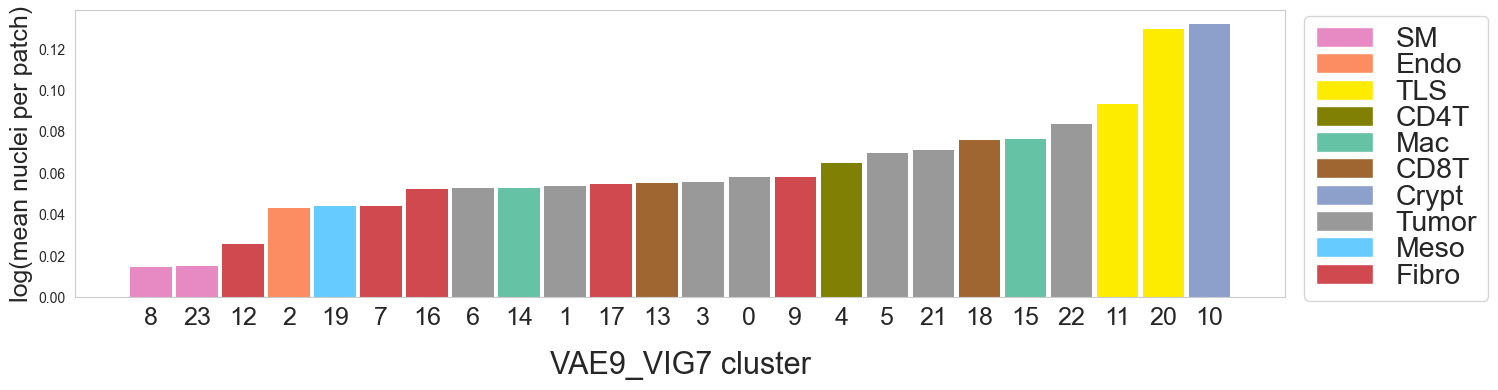

In [5]:
# generate bar plot of mean nuclei values per VAE9 image patch cluster

# read mean nuclei dataframe
means_df = pd.read_csv(os.path.join(out, 'cluster_cell_count_means.csv'), index_col=0)
means_df = pd.Series(means_df['0'])
means_df = round(means_df, 3)
means_df.sort_values(inplace=True)

# color LUT
cluster_dict = {
    'SM': ([8, 23],'#e78AC3'), 'Endo': ([2],'#fC8D62'), 'TLS': ([11, 20], '#FDEC00'),
    'CD4T': ([4],'#808004'), 'Mac': ([14, 15], '#66C2A5'), 'CD8T': ([13, 18], '#9F6632'),
    'Crypt': ([10],'#8DA0CB'), 'Tumor': ([0, 1, 3, 5, 6, 21, 22], '#999999'),
    'Meso': ([19], '#66CCFF'), 'Fibro': ([7, 9, 12, 16, 17], '#CF494E') 
}
mpp_colors = {}
for cat, (clusters, color) in cluster_dict.items():
    mpp_colors.update({str(k): v for k, v in zip(clusters, [color]*len(clusters))})

# plot
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(
    x=[str(i) for i in means_df.index], height=np.log10(means_df.values),
    color=[mpp_colors[str(i)] for i in means_df.index], alpha=1.0, width=0.9, ec='k', lw=0.0
)

plt.ylabel('log(mean nuclei per patch)', fontsize=18)
plt.xlabel('VAE9_VIG7 cluster',fontsize=22, labelpad=15)
ticks = plt.xticks(fontsize=18)

patches = [Patch(facecolor=color, alpha=1.0, edgecolor=None) for color in [i[1] for i in cluster_dict.values()]]
plt.legend(
    patches, cluster_dict.keys(),
    title=None, prop={'size': 20.5},
    labelspacing=0.01, bbox_to_anchor=[1.18, 1.03], loc='upper right'
    )
plt.grid(False)

plt.tight_layout()
plt.savefig(os.path.join(out, f'cluster_cell_count_means.pdf'))
print('Stromal tissue tends to be cellularly diffuse, while lymphoid tissue tends to be cellularly dense, and epithelial tissue is variable') 
plt.show()
plt.close('all')